# Case Study: Predicting Car Prices
# Lab 1
Date: 29/08/2023


Dataset: Car Price CSV



# Preparing the datasets

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn import preprocessing
warnings.filterwarnings('ignore')


In [2]:
# Checking ther versions
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

# A. Load Data

In [3]:
#Reading the csv file using pandas and storing in the df variable
df=pd.read_csv('cars.csv')

In [4]:
# printing the first rows of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Checking the shape of the data
df.shape

(8128, 13)

In [6]:
# Obtaining the stastiscal information of the data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Checking the Dtypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Checking the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# Renaming the columns 

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [10]:
# Renaming and replacing the columns according to convenience
df.rename(columns ={
    'name':'brand'
}, inplace=True)

In [11]:
#Veryfying if the columns have been renamed
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [12]:
#Checking the unique values in owner column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

# Task 1.1
For the feature owner. mapping First Owner to 1, Second Owner to 2, Third Owner to 3, Fourth & Above Owner to 4 and Test Drive Car to 5

In [13]:
# Defining a mapping of values to numerical encodings
encoding_map = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

In [14]:
# Encoding the labels in the column 'owner'
df['owner'] = df['owner'].map(encoding_map)

In [15]:
#Veryfying the output of the label owner
df["owner"].unique()

array([1, 2, 3, 4, 5], dtype=int64)

# Task 1.2
Removing the rows with the fuel of value of fuels with LPG and CNG

In [16]:
# Getting all the unique values of column fuel
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [17]:
# Saving the values to remove in a array
values_to_remove=['CNG','LPG']

In [18]:
# Removing the rows with the specified values and reflecting it in the dataframe
df =df[~df['fuel'].isin(values_to_remove)]

In [19]:
# Checking the values in the column fuel
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

# Task 1.3

Removing kmpl in feature mileage and converting the column to numerical type in this case float

In [20]:
# Getting some values of the feature mileage
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [21]:
# Removing the kmph frpm the records in the column mileage using split such that only the first part of the string is taken while the second part i.e. the kmph (unit) is discarded
df['mileage']=df['mileage'].str.split().str[0]

In [22]:
# Converting the data type of mileage feature to float from string
df['mileage']=df['mileage'].astype(float)

In [23]:
# Veryfying the type of the column mileage
df['mileage'].dtypes

dtype('float64')

# Task 1.4

Removing "CC" from the feature engine and coverting the column to numerical (float) type


In [24]:
# Getting the unique values of the feature engine
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8033, dtype: object

In [25]:
# Removing the CC from the records in the column engine using split such that only the first part of the string is taken while the second part i.e. the CC (unit) is discarded
df['engine']= df.engine.str.split().str[0]

In [26]:
# Veryfying the values of engine column
df['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

In [27]:
# Converting the type of mileage column to float from object (string)
df['engine']=df['engine'].astype(float)
# Veryfying the type of the column engine
df['engine'].dtypes

dtype('float64')

# Task 1.5

Removing "bhp" from the feature max_power named as power and coverting the column to numerical (float) type


In [28]:
# Getting the few values of the feature max_power
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [29]:
# Removing the bhp frpm the records in the column max_power using split such that only the first part of the string is taken while the second part i.e. the bhp (unit) is discarded

df['max_power']=df.max_power.str.split().str[0]

#veryfying the output
df['max_power'].head()

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [30]:
# Converting max_power to float
df['max_power']=df['max_power'].astype('float')

## Veryfying the type of the column max_power
df['max_power'].dtypes

dtype('float64')

# Task 1.6

Taking only the first part of the feature brand

In [31]:
# Analysing the column brand
df['brand'].head()

0          Maruti Swift Dzire VDI
1    Skoda Rapid 1.5 TDI Ambition
2        Honda City 2017-2020 EXi
3       Hyundai i20 Sportz Diesel
4          Maruti Swift VXI BSIII
Name: brand, dtype: object

In [32]:
# Splitting the brand feature and only taking the first part
df['brand']= df.brand.str.split().str[0]
#Veryfying the ouput
df['brand'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: brand, dtype: object

In [33]:
# Finding mode of brand
df['brand'].mode()

0    Maruti
Name: brand, dtype: object

# Task 1.7

Removing the feature torque from the dataframe

In [34]:
# Removing the column torque using the drop column function
df=df.drop(['torque'],axis=1)

# Task 1.8

Removing the records with the owner as Test Drive Car i.e. owner =5 (according to our encoding)

In [35]:
# Using the query method of data frame which makes a copy from the original dataframe with the query (where owner is not 5 i.e. Test Drive Car) as string and saving it to our dataframe
df=df.query('owner != 5')

In [36]:
# Veryfying the output of the dataframe
df['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

In [37]:
# After the completion of all specified tasks

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


# Performing label encoding in some features
Label Encoding is defined as the representation of categorical variables into integers

In [38]:
df.reset_index(inplace=True)

In [39]:
from sklearn.preprocessing import OneHotEncoder

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):

    encoded = encoder.transform(dataframe[[feature]])

    # Transform encoded data arrays into dataframe where columns are based values
    categories = encoder.categories_[0]
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    
    return concat_dataframe.drop(feature, axis=1)

In [40]:
# Since 'brand' and 'seller_type' have than two unique values, we should apply one-hot encoding
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
df = one_hot_transform(brand_ohe, df, 'brand')

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder_fuel = LabelEncoder()
label_encoder_transmission = LabelEncoder()
label_encoder_seller_type = LabelEncoder()

# Fitting and transforming the fuel, transmission and seller type column
df['fuel'] = label_encoder_fuel.fit_transform(df['fuel'])
df['transmission'] = label_encoder_transmission.fit_transform(df['transmission'])
df['seller_type'] = label_encoder_seller_type.fit_transform(df['seller_type'])

# Displaying the first few rows of the DataFrame with label encoding
df

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,2014,450000,145500,0,1,1,1,23.40,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2014,370000,120000,0,1,1,2,21.14,1498.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,2006,158000,140000,1,1,1,3,17.70,1497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2010,225000,127000,0,1,1,1,23.00,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2007,130000,120000,1,1,1,1,16.10,1298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,8123,2013,320000,110000,1,1,1,1,18.50,1197.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8024,8124,2007,135000,119000,0,1,1,4,16.80,1493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8025,8125,2009,382000,120000,0,1,1,1,19.30,1248.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8026,8126,2013,290000,25000,0,1,1,1,23.57,1396.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
# Excluding one-hot encoded features
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
dfcopy = df.copy()
dfcopy = df[selected_cols]

In [43]:
dfcopy

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0
1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0
3,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0
4,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8023,2013,320000,110000,1,1,1,18.50,1197.0,82.85,5.0
8024,2007,135000,119000,0,1,4,16.80,1493.0,110.00,5.0
8025,2009,382000,120000,0,1,1,19.30,1248.0,73.90,5.0
8026,2013,290000,25000,0,1,1,23.57,1396.0,70.00,5.0


In [44]:
df.drop(columns='index', inplace=True)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,2013,320000,110000,1,1,1,1,18.50,1197.0,82.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8024,2007,135000,119000,0,1,1,4,16.80,1493.0,110.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8025,2009,382000,120000,0,1,1,1,19.30,1248.0,73.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8026,2013,290000,25000,0,1,1,1,23.57,1396.0,70.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# B. Exploratory Data Analysis

In [45]:
# Separating the continuous and categorical columns of the dataframe

# Excluding the selling_price column from the list
df_copy=dfcopy.loc[:,dfcopy.columns!='selling_price']

# First separating numerical features except the selling_price
num_feat = df_copy.select_dtypes(include=['int64',"float64"])

# Then separating the categorical features
cat_feat =df.select_dtypes(exclude=['int64','float64'])

#Verifying them
num_feat.columns,cat_feat.columns

# As all features have been encoded all columns are numerical


(Index(['year', 'km_driven', 'owner', 'mileage', 'engine', 'max_power',
        'seats'],
       dtype='object'),
 Index(['fuel', 'seller_type', 'transmission'], dtype='object'))

# B.1 Univariate Analysis
Exploring the data using single variable data analysis

# B.1.2 Distribution plot 

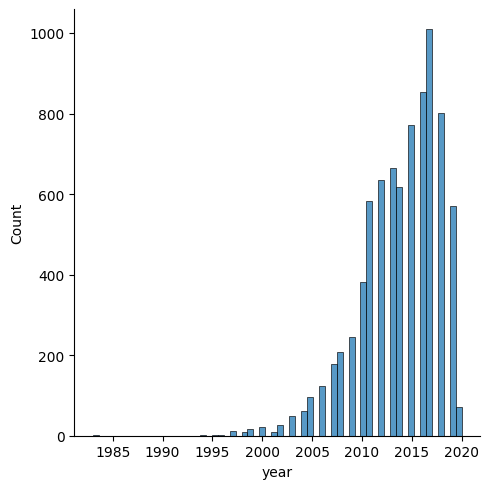

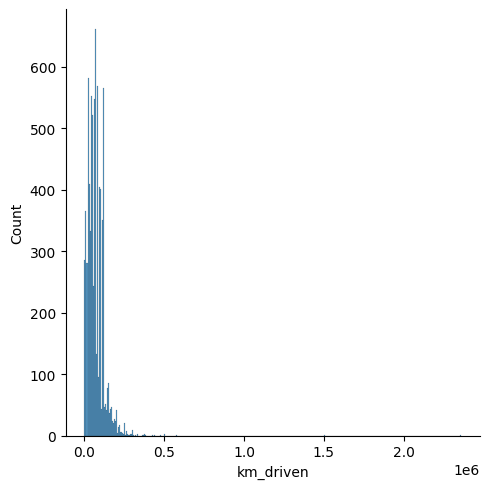

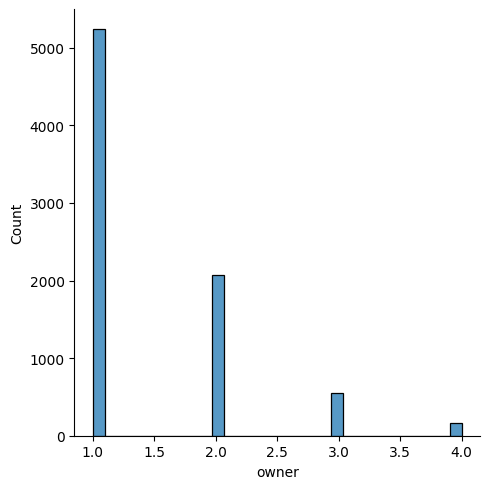

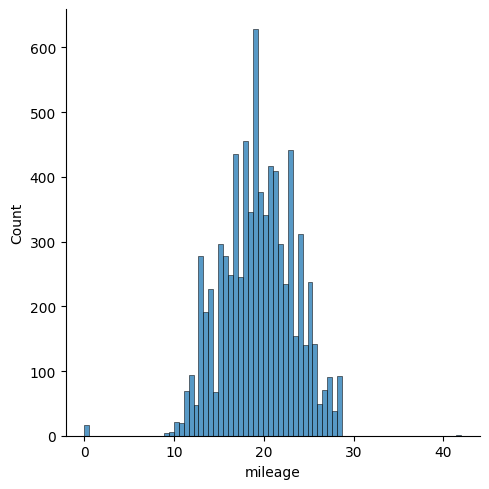

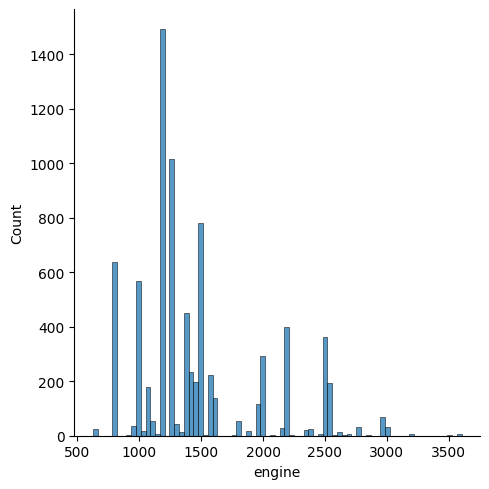

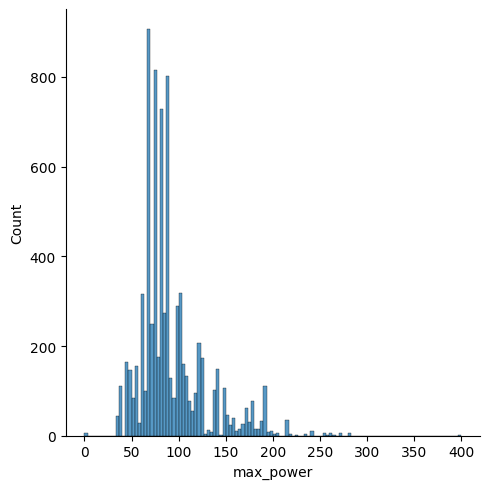

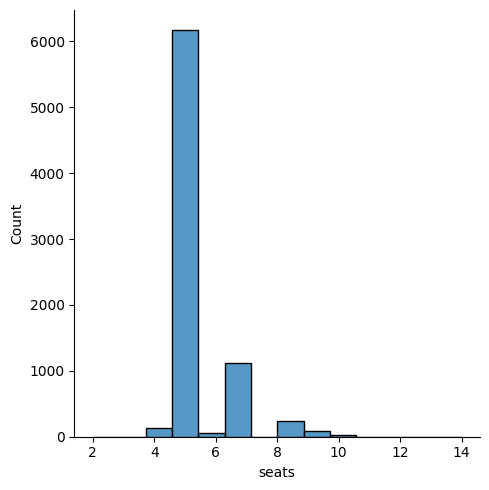

In [46]:
# Using the distribution plot to get the count of all the numeric features except selling_price
for col in num_feat.columns:
    sns.displot(df, x=df[col])

# B.2 Multivariate Anaysis

Using multiple variable data analysis to see the trend of data

# B.2.1 Boxplot

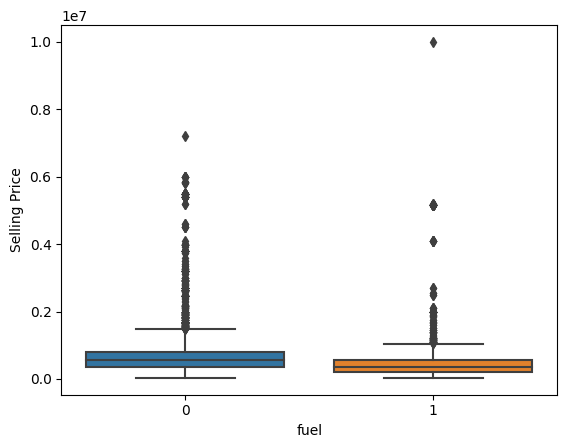

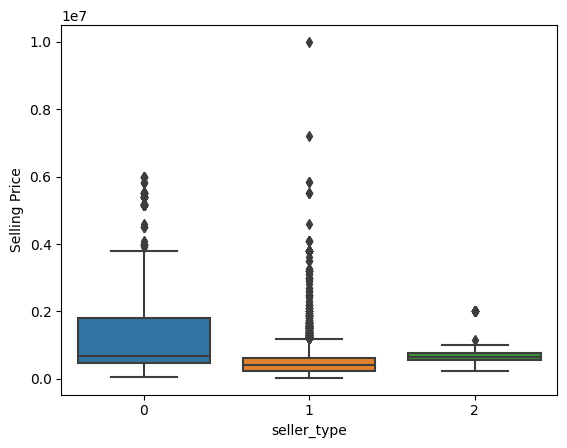

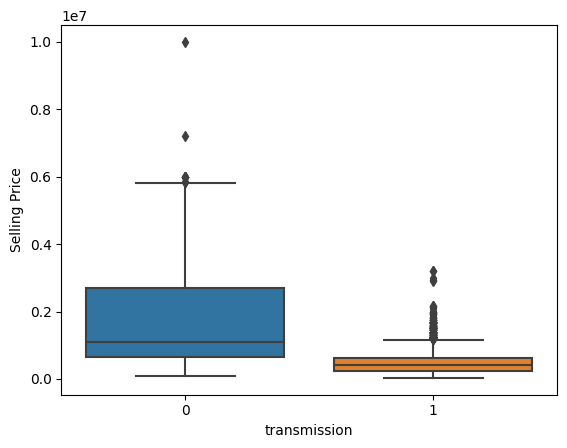

In [47]:
# Observing the box plot on categorical columns and selling_price
for col in cat_feat.columns:
    sns.boxplot(x=df[col], y=df['selling_price']);
    plt.ylabel("Selling Price")
    plt.xlabel(col)
    # None returned all columns are categorical
    plt.show()

# B.2.2 Scatterplot

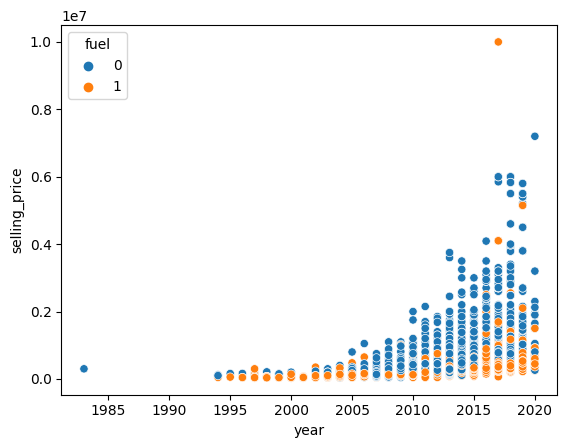

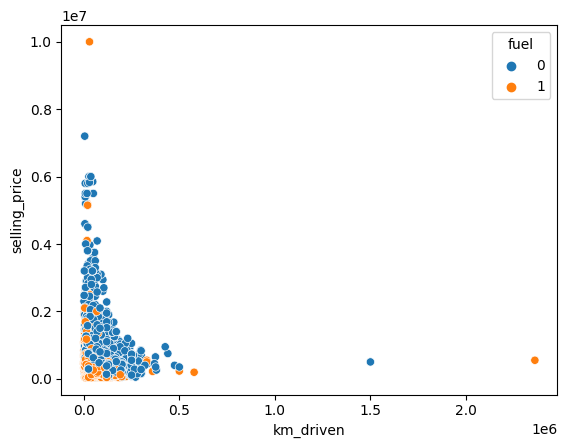

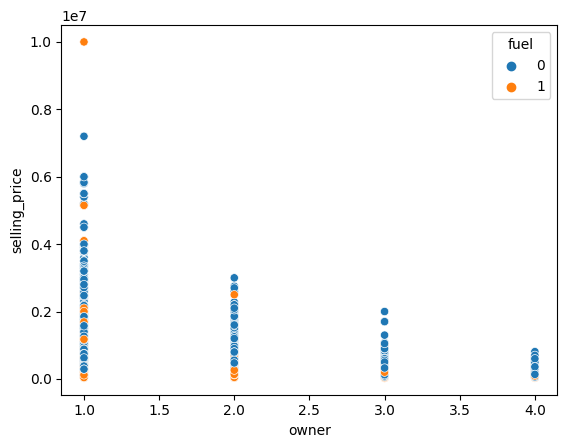

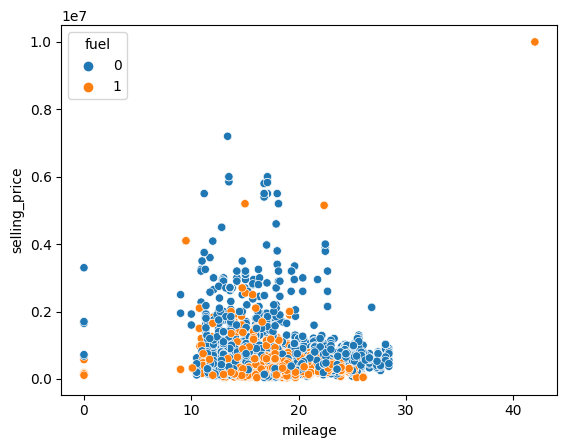

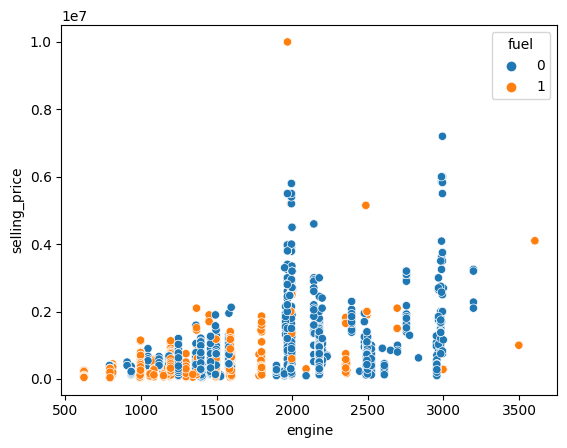

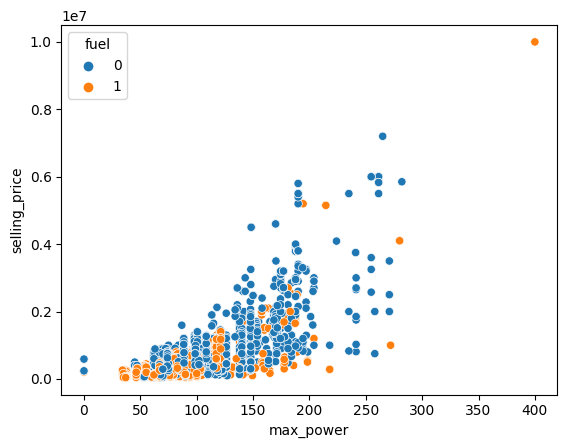

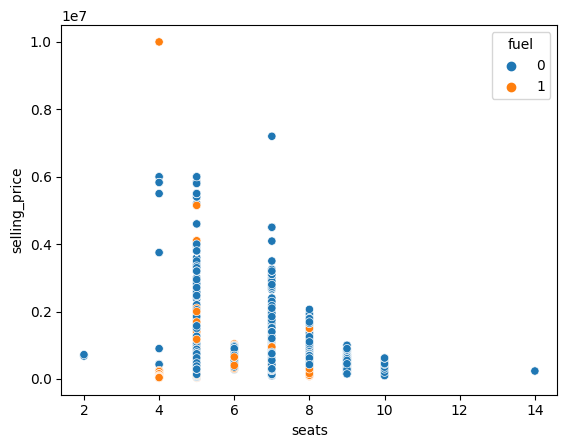

In [48]:
# PLotting the continuous features in the scatter plot against selling_price with fuel as the hue
for col in num_feat.columns:    
    sns.scatterplot(x=df[col], y=df['selling_price'], hue=df['fuel'])
    plt.show()

# Correlation Matrix
Finding the direction and strength of the relationship using the correlation matrix 

In [49]:
dfcopy

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0
1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0
3,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0
4,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8023,2013,320000,110000,1,1,1,18.50,1197.0,82.85,5.0
8024,2007,135000,119000,0,1,4,16.80,1493.0,110.00,5.0
8025,2009,382000,120000,0,1,1,19.30,1248.0,73.90,5.0
8026,2013,290000,25000,0,1,1,23.57,1396.0,70.00,5.0


<Axes: >

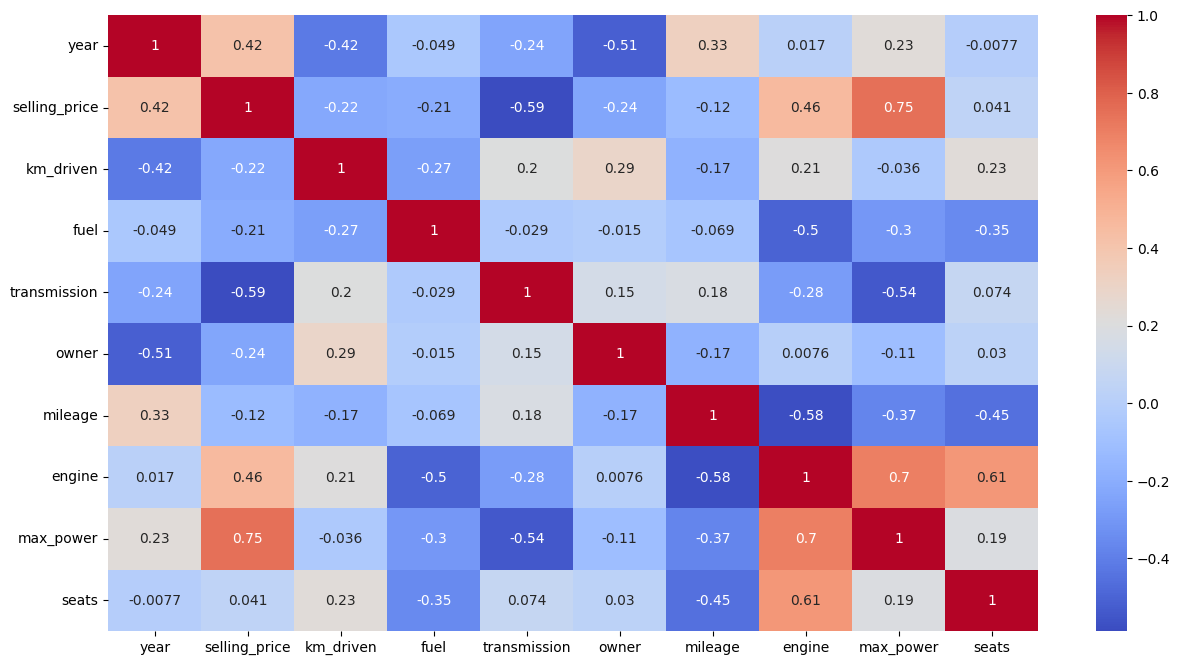

In [50]:
plt.figure(figsize = (15,8))
sns.heatmap(dfcopy.corr(numeric_only=True), annot=True, cmap="coolwarm")

# Predictive Power Score

Analyzing the predictive power of all features in realtion to selling price

<Axes: xlabel='x', ylabel='y'>

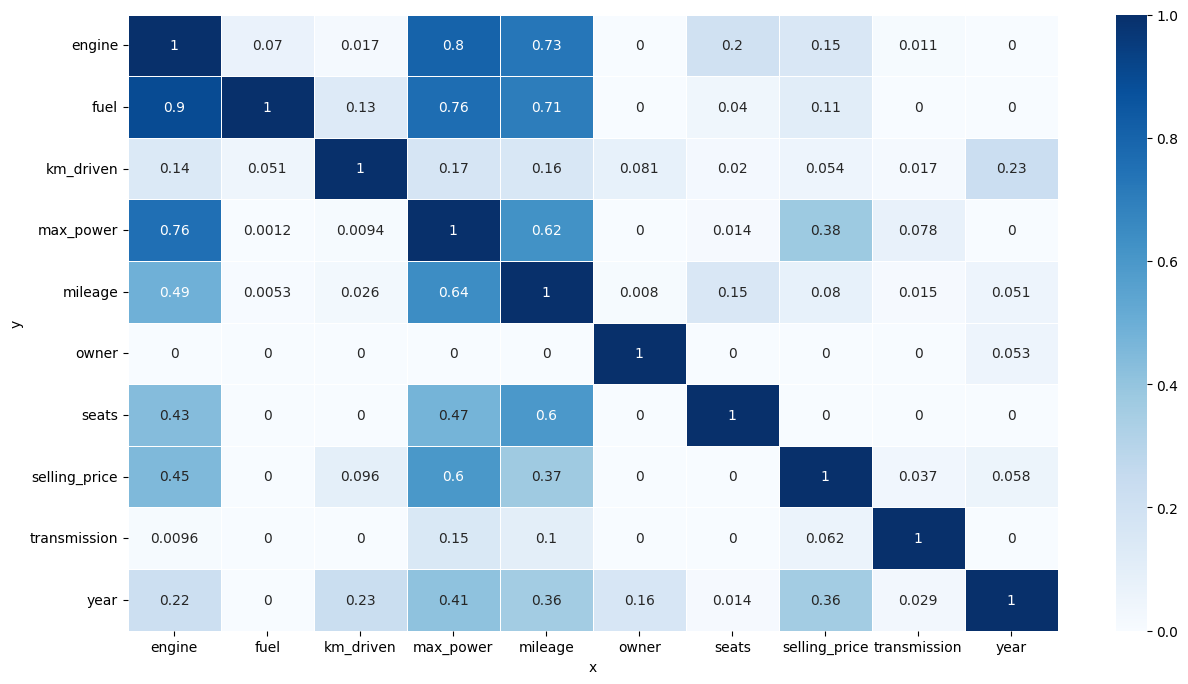

In [51]:
import ppscore as pps

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [52]:
dfcopy

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0
1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0
3,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0
4,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8023,2013,320000,110000,1,1,1,18.50,1197.0,82.85,5.0
8024,2007,135000,119000,0,1,4,16.80,1493.0,110.00,5.0
8025,2009,382000,120000,0,1,1,19.30,1248.0,73.90,5.0
8026,2013,290000,25000,0,1,1,23.57,1396.0,70.00,5.0


# Feature Selection

In [53]:
brand_cats = list(brand_ohe.categories_[0][1:])
selected_cols = ['max_power', 'year', 'fuel','mileage'] + brand_cats
X = df[selected_cols]
y = np.log(df['selling_price'])

# Splitting the data into test and train sets
Done before preprocessing to ensure that the train values do not flow into the test set

In [54]:
# Importing the required libraries
from sklearn.model_selection import train_test_split
# Splitting into test and train based on a specified test size and random state (only the important features are taken)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Preprocessing

# Null Values

In [55]:
# Checking for null values in X_train
X_train[['year','max_power','mileage','fuel']].isna().sum()

year           0
max_power    149
mileage      154
fuel           0
dtype: int64

In [56]:
# Checking for null values in X_test
X_test[['year','max_power','mileage','fuel']].isna().sum()

year          0
max_power    59
mileage      60
fuel          0
dtype: int64

In [57]:
# Checking for null values in y_train
y_train.isna().sum()

0

In [58]:
# Checking for null values in y_test
y_test.isna().sum()

0

# Finding the mean, mode and median of all selected features

In [59]:
# Finding median of max_power
X_train['max_power'].median()

82.4

In [60]:
# Finding mean of max_power
X_train['mileage'].mean()


19.41689295516926

In [61]:
# Finding mode of year
X_train['year'].mode()

0    2017
Name: year, dtype: int64

# Filling in the missing numerical values
 Verifying the distribution of all the missing data

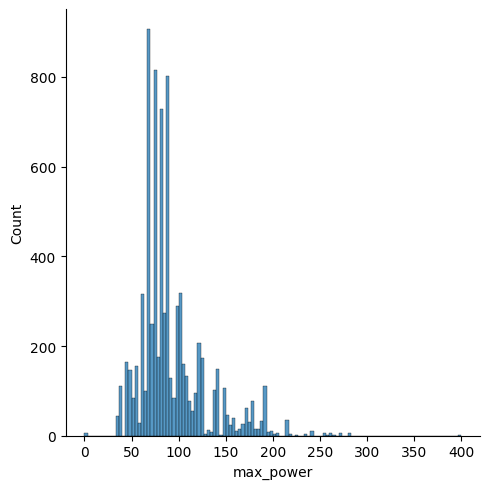

In [62]:
# Verifying the distribution of the missing max_power column
sns.displot(data=df,x='max_power')

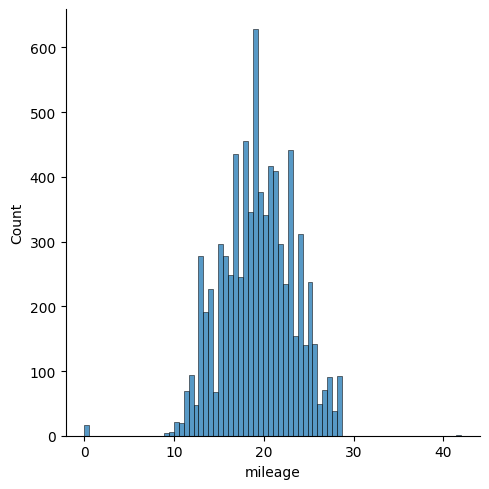

In [63]:
# Verifying the distribution of the missing mileage column
sns.displot(data=df,x='mileage')

In [64]:
# First working with the training set
# As the distribution plot of max_power column appears more skewed the median is chosen to fill in the missing values
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)


# As the distribution of mileage looks bell-shaped curve (normally distributed), the mean is chosen to fill in the missing values
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)



In [65]:
# Now working with the testing set 
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [66]:
# Reverifying the missing datas
# First in X_train
X_train[['year','max_power','mileage','fuel']].isna().sum()

year         0
max_power    0
mileage      0
fuel         0
dtype: int64

In [67]:
# Then in X_test
X_test[['year','max_power','mileage','fuel']].isna().sum()

year         0
max_power    0
mileage      0
fuel         0
dtype: int64

In [68]:
# Then for y_test and y_train 
y_test.isna().sum(), y_train.isna().sum()

(0, 0)

# Checking for outliers
Higher outlier count decreases the accuracy of the model. Hence, checking for it through the quartiles and interquartile range

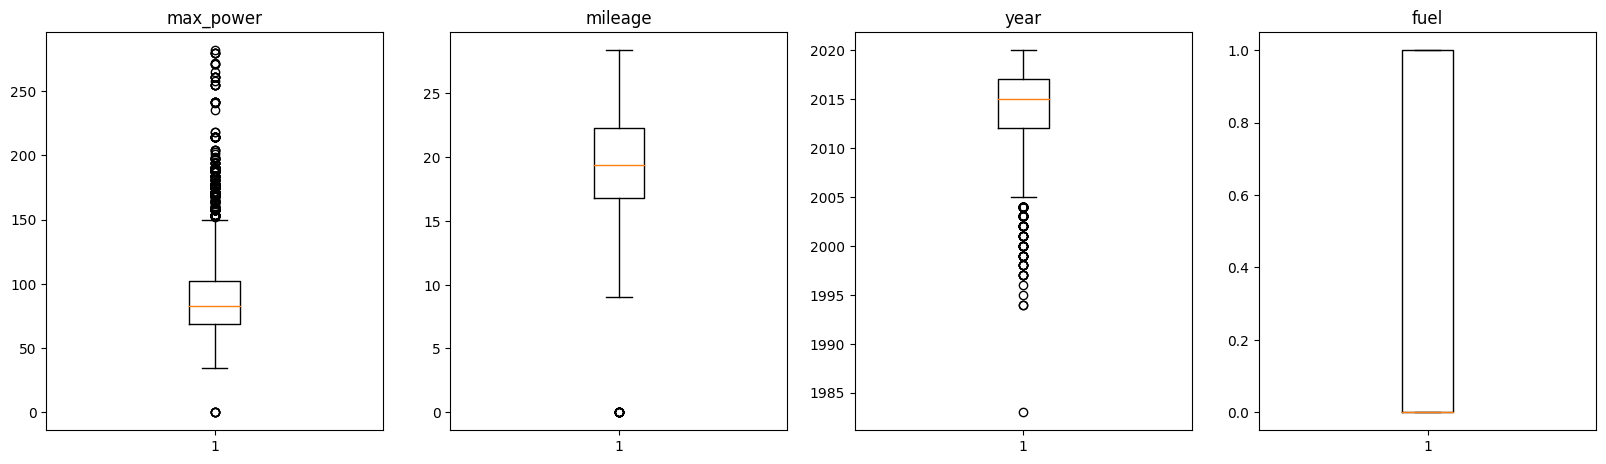

In [69]:
# Creating a dictionary of columns.
col_dict = {'max_power':1, 'mileage':2,'year':3, 'fuel':4}

# Detecting outliers in each variable using box plots.
plt.figure(figsize=(20, 30))

#Looping through col_dict
for variable, i in col_dict.items():
    # Creating subplots within a large figures. the arguments 5 and 4 spethat the figure should have a grid of 5 rows and 4 columns of subplots. While the argument i specifies the current position of the subplot within the grid, based on the values from col_dict
    plt.subplot(5, 4, i)
    plt.boxplot(X_train[variable])
    # Setting the title of the current subplot to the name of the column (variable) being visualized.
    plt.title(variable)

plt.show()

In [70]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [71]:
# Printing all the outliers in each of the features
for col in X_train[['max_power', 'year','mileage']]:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%


# Scaling
As the number of outliers is low it is neglected and scaling of the features is resumed

In [72]:
# Importing the requied library
from sklearn.preprocessing import MinMaxScaler
num_cols =['max_power','year','mileage']
# Feature scaling to help reach convergence faster
scaler = MinMaxScaler(feature_range=(0,1))
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [73]:
# Verifying the shape of all X_train, X_test, Y_train and Y_test

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 35)
Shape of X_test:  (2409, 35)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


# Modelling

In [74]:
# Using the Random Forest Regressor as it is a regression based problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = RandomForestRegressor()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print(yhat)
feature_importances = lr.feature_importances_
print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

[12.26806249 13.8033837  12.77418988 ... 11.79844331 13.56990586
 12.58352727]
MSE:  0.04597431011708316
r2:  0.9346572339760837


In [75]:
# Performing Cross validation to compare the efficincy of different algorithms in our model

# Importing the libraries for model evaluation
from sklearn.ensemble import RandomForestRegressor #we are using regression models
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


# models that we will be using, putting them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]


In [76]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

# Defining the cross-validation strategy using KFold with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.0703022  -0.06804518 -0.0696881  -0.07664936 -0.06888258]; Mean: -0.07071348284515042


SVR - Score: [-0.05734654 -0.05773145 -0.05671063 -0.06164092 -0.05595765]; Mean: -0.05787743861501643
KNeighbors Regressor - Score: [-0.06955741 -0.05449628 -0.05779138 -0.05167032 -0.06871239]; Mean: -0.06044555542994144
Decision-Tree Regressor - Score: [-0.07208409 -0.06244998 -0.05594349 -0.06700925 -0.07546584]; Mean: -0.06659052901625964
Random-Forest Regressor - Score: [-0.05441885 -0.04646551 -0.04554458 -0.04819189 -0.05723896]; Mean: -0.05037195835099072


# Grid Search
According to Cross validation random Forest Regressor (the model that is used) is the model with the highest efficiency. 
Hence now searching for the best version of the model through grid search

In [77]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid to search over
param_grid = {'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

# Creating the Random Forest Regressor Object
rfr = RandomForestRegressor(random_state = 1)

# Creating the Random Forest Regressor instance with a fixed random state for reproducibility
grid = GridSearchCV(estimator = rfr, # Using the Random Forest Regressor instance
                    param_grid = param_grid, # Testing the different combinations of parameters from the param_grid
                    cv = kfold, # Using the defined KFold cross-validation strategy
                    n_jobs = -1, # Using all available CPU cores for parallel processing
                    return_train_score=True, # Including training scores in the results
                    refit=True, # Refitting the best model on the full dataset after finding the best parameters
                    scoring='neg_mean_squared_error') # Using negative mean squared error as the scoring metric

# Fitting the grid search to the training data
grid.fit(X_train, y_train)

# Getting the best parameters and best negative MSE score
best_params = grid.best_params_ # Best combination of parameters found during the search
best_mse = -grid.best_score_  # Best negative MSE score; negate to get actual MSE value

# Printing the results
print("Best Parameters:", best_params)
print("Best MSE:", best_mse)

Best Parameters: {'max_depth': None, 'n_estimators': 13}
Best MSE: 0.051172017564664794


# Testing

Comparing our predicted and actual label values. Hence, searching for instances of over or under fitting

In [78]:
# Storing the predicted values for the target found by the best model based on GridSearchCV
yhat = grid.predict(X_test)

# Calculating the MSE
print("MSE: ", mean_squared_error(y_test, yhat))
print("R2: ", r2_score(y_test, yhat))

MSE:  0.047780587644745943
R2:  0.9320899921933632


In [79]:
# Comparing the actual and predicted selling prices
# Setting the desired decimal precision for display
pd.options.display.float_format = '{:.2f}'.format  # Set to 2 decimal places

pd.DataFrame({'Actual Price:': np.exp(y_test), 'Predicted Price:': np.exp(yhat)})

,Actual Price:,Predicted Price:
5867,225000.00,199700.45
5957,900000.00,951230.20
3032,320000.00,358212.95
6445,650000.00,494725.10
318,520000.00,630524.92
...,...,...
5670,200000.00,228593.76
1003,600000.00,715225.85
4801,150000.00,125882.68
7446,650000.00,779211.45


# Analysis: Feature Importance

As our actual and predicted prices are very near. The next step is to analyze the importance of each feature in the model

Finding the most important features for prediction using algorithm, permutation and shap

# Algorithm way

In [80]:
#note that grid here is the Random Forest Regressor
# As the alogorith provides the feature importance score we are checking it
rfr = grid.best_estimator_

rfr.feature_importances_

array([4.44287458e-01, 4.65929847e-01, 1.15703742e-02, 2.97056815e-02,
       3.58465656e-08, 1.43115712e-04, 6.59748288e-04, 3.17057576e-03,
       3.21946810e-05, 3.49652749e-04, 4.68687648e-04, 5.76261491e-05,
       2.10288024e-03, 1.24319677e-03, 1.18695448e-03, 2.09675709e-05,
       1.21753344e-03, 2.77847262e-05, 1.06494702e-04, 2.82452488e-04,
       1.13771176e-08, 2.13943186e-08, 8.97075286e-03, 2.22797178e-03,
       1.08930764e-03, 1.15907068e-04, 2.41361372e-04, 0.00000000e+00,
       0.00000000e+00, 5.06879123e-04, 6.37477482e-04, 1.35621926e-02,
       8.09355442e-03, 1.50065130e-03, 4.90648729e-04])

<BarContainer object of 35 artists>

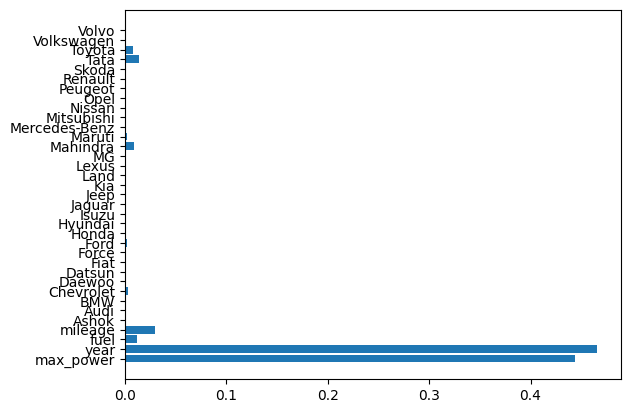

In [81]:
# Plotting the Bar Graph of the columns and their importance
plt.barh(X.columns, rfr.feature_importances_)

# Permutation

Text(0.5, 0, 'Random Forest Regressor Feature Importance')

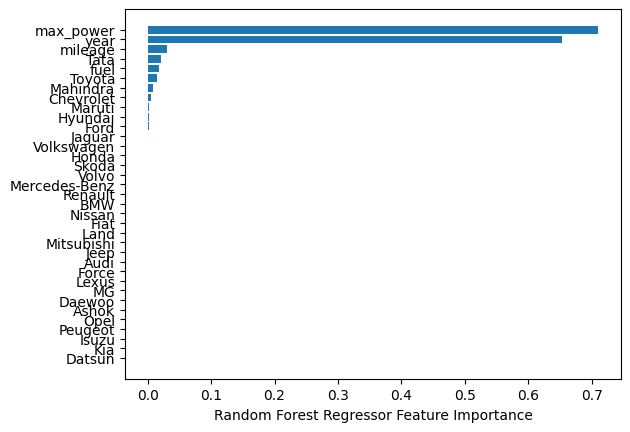

In [82]:
from sklearn.inspection import permutation_importance
# Calculating the permutation importance using the Random Forest Regressor model (rfr) on the test data (X_test, y_test)
perm_importance = permutation_importance(rfr, X_test, y_test)

# Sorting the feature indices by mean importance score
sorted_idx = perm_importance.importances_mean.argsort()

# Plotting the feature importances in a horizontal bar plot
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])

plt.xlabel("Random Forest Regressor Feature Importance")

# Shap

In [83]:
import shap

# Creates a SHAP "Tree Explained" that explains predicted from tree-based models ( in this case the Random Forest Regressor i.e. rfr)
explainer = shap.TreeExplainer(rfr)

# Calculating the SHAP values for each feature and instance of data base (how much each feature value contributed to the prediction)
shap_values = explainer.shap_values(X_test)

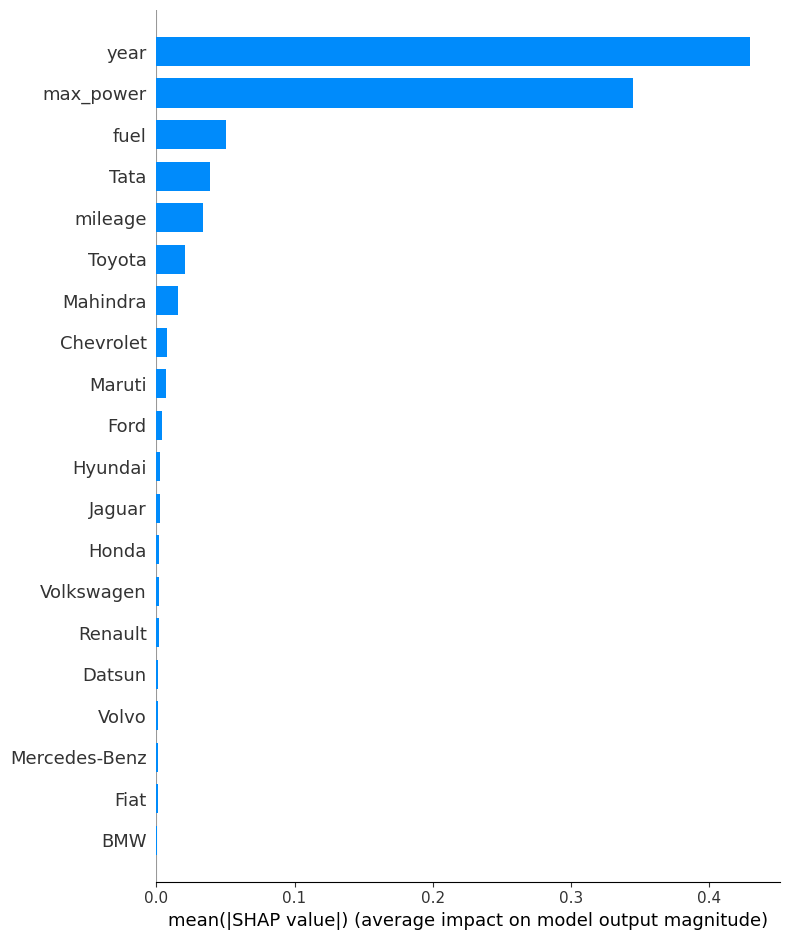

In [84]:
# Obtaining the shap plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

# Inference

In [85]:
import pickle
# Saving the model to disk
filename = 'pages/Model/car-prediction.model-one'
pickle.dump(grid, open(filename, 'wb'))
label_encoder_fuel_path = 'pages/Model/brand-fuel.model-one'
scaler_path = 'pages/Model/car-scalar.model-one'
feature_importance_path = 'pages/Model/feature_importance.model-one'
pickle.dump(label_encoder_fuel, open(label_encoder_fuel_path, 'wb'))
pickle.dump(scaler, open(scaler_path, 'wb'))
pickle.dump(rfr, open(feature_importance_path, 'wb'))
print(filename)


pages/Model/car-prediction.model-one


In [86]:
# loading the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
scalar_model = pickle.load(open(scaler_path, 'rb'))
label_fuel_model = pickle.load(open(label_encoder_fuel_path, 'rb'))
feature_importances_model = pickle.load(open(feature_importance_path, 'rb'))

# Working with Example

In [87]:
# Define our own sample of car
sample_df = pd.DataFrame([[107, 2017, 0, 'BMW',100]],
                         columns=['max_power', 'year', 'fuel', 'brand','mileage'])
sample_df

,max_power,year,fuel,brand,mileage
0,107,2017,0,BMW,100


In [88]:
loaded_model.feature_names_in_

array(['max_power', 'year', 'fuel', 'mileage', 'Ashok', 'Audi', 'BMW',
       'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG',
       'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan',
       'Opel', 'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object)

In [89]:
# Encode and scale each feature
sample_df[num_cols] = scaler.transform(sample_df[num_cols])
sample_df = one_hot_transform(brand_ohe, sample_df, 'brand')
sample_df

,max_power,year,fuel,mileage,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0.38,0.92,0,3.52,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [90]:
# predicted selling price based on our sample of car
print(f"Predicted selling price: {np.exp(loaded_model.predict(sample_df))[0]}")

Predicted selling price: 750916.0743921857


In [91]:
label_fuel_model.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [92]:
feature_importances_model.feature_importances_

array([4.44287458e-01, 4.65929847e-01, 1.15703742e-02, 2.97056815e-02,
       3.58465656e-08, 1.43115712e-04, 6.59748288e-04, 3.17057576e-03,
       3.21946810e-05, 3.49652749e-04, 4.68687648e-04, 5.76261491e-05,
       2.10288024e-03, 1.24319677e-03, 1.18695448e-03, 2.09675709e-05,
       1.21753344e-03, 2.77847262e-05, 1.06494702e-04, 2.82452488e-04,
       1.13771176e-08, 2.13943186e-08, 8.97075286e-03, 2.22797178e-03,
       1.08930764e-03, 1.15907068e-04, 2.41361372e-04, 0.00000000e+00,
       0.00000000e+00, 5.06879123e-04, 6.37477482e-04, 1.35621926e-02,
       8.09355442e-03, 1.50065130e-03, 4.90648729e-04])

# Report for Car Prediction

The created car prediction model is a simple machine learning model that has been created on the basis of analysis of feature importance and the evaluation of performance of different algorithms. Our initial dataset had the features: Name (brand), Year, kmdriven, fuel, seller type, transmission, owner, mileage, engine, ax_power and torque and seats, and selling price as the label (what we are predicting).

According to as stated instruction the strings have been trimmed ,the data types have been changed and the column has been dropped. The categorical values have also been changed into numerical value using the Label Encoder. The one hot encoding has not been used to prevent information loss and also as random forest can handle categorical features without it, hence using it could only lead to complexity. 

# Feature Selection
Features such as brand, year, max_power, mileage and fuel were found to be highly essential while predicting the label. 
1. Brand: The brand of a car often carries a significance importance in it's selling price. Premium and trusted brands are something everyone always pays more to buy in contrast to their counterparts.

2. Year of Manufacture: The year here denotes the age of the car. Newer yeared cars always more advanced features, improved safety standards and better technology. Thus, year helps capture the temporal aspect of price change.

3. Max power and mileage: Max power and mileage are crucial efficiency indicators. Cars with higher mileage and max power denote better performance (power) and lower running costs (mileage) hence fetching better price.

4. Fuel type: Fuel of a car directly impacts the the long-term operating cost and environmental impact of a car. The fuel prices also affect the selling price (lower the price of a particular fuel, higher its price will be).

While the other features such as seats, seller_type and owner have not used as they have been found to have lower impact in the overall selling price and might affect more on the car preference. While engine and max power are extremely correlated (the power of the car comes from the engine. Better the engine, more the power of the car) and the one among them with higher predictability score was taken. Similarly, the column torque was dropped as Chaky car company does not understand it yet.

# Algorithm

The model chosen for the prediction was Regression Forest Regressor Algorithm as it is an ensemble learning technique that combines multiple decision trees to make predictions. This model is also highly effective for regression like predicting car prices due to its ability to handle non-linear relationships, capture interactions between features, and manage outliers.

Other algorithms were not selected as:
1. Linear Regression:  Linear algorithms like Linear Regression assume linear relationships between features and the target. While some relationships in predicting car prices might be linear (e.g., year vs. price), others are likely more complex and non-linear (e.g., brand vs. price). Linear Regression might struggle to capture these non-linear patterns effectively.


2. Deep Learning Models: Complex algorithms, like deep learning models, might require more computational resources and longer training times.

3. Regularizating Techniques: Regularization techniques (e.g., L1, L2 regularization) can mitigate overfitting in some algorithms.

Hence, for regression task like this the Random Forest Regressor has been selected.


# Conclusions
In conclusion, the feature importance analysis of features 'max_power', 'name', 'mileage' and 'fuel' showed significant role in predicting car selling prices. For prediction, Random Forest Regressor has been used which offers beter predictive performance for regression performance based dataset such as this.